In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [97]:

data = pd.read_csv("C:/Users/namle/dsproject/clean_data/clean_data_v2.csv")

In [98]:
CPU = []
for cpu in data['CPU']:
  cpu = cpu.replace('-', ' - ')
  if len(cpu.split()) >= 2:
    name_cpu = cpu.split()[0:2]
    CPU.append(' '.join(name_cpu))
  else:
    CPU.append(cpu)

data['CPU'] = CPU

In [99]:
data

,Unnamed: 0,Laptop_name,Year,OS,CPU,CPU_Cores,CPU_Threads,CPU_Default_Clock,CPU_Boosted_Clock,CPU_Transistor_Size(nm),...,RAM(GB),RAM_bus,RAM_DDR,Storage(GB),Storage_Type,Display_Inch,Display_Height(pixel),Display_Width(pixel),Weight(kg),Price(USD)
0,0,MSI CreatorPro Z16P B12UKST,2022,Windows,core i7,14,20,2.3,4.7,10,...,32,0,5,1024,SSD,16.0,2560,1600,2.372,3679.0
1,1,"Xiaomi RedmiBook Pro 15, i5-11320H iGPU",2022,Windows,core i5,4,8,2.5,4.5,10,...,16,0,4,512,SSD,15.6,3200,2000,1.745,NaN
2,2,LG Ultra-PC 16 16U70Q-G.AR36G,2022,Windows,ryzen 3,4,8,2.6,3.8,7,...,8,0,4,512,SSD,16.0,1280,1200,1.599,NaN
3,3,Lenovo Legion Slim 7-16IAH 82TF004YGE,2022,Windows,core i7,14,20,2.3,4.7,10,...,16,0,5,1024,SSD,16.0,2560,1600,2.206,2313.0
4,4,Lenovo Legion S7 16ARHA7,2022,Windows,ryzen 9,8,16,3.3,4.9,6,...,16,0,5,1024,SSD,16.0,2560,1600,2.181,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,1902,Apple MacBook Pro 14 2021 M1 Pro Entry,2021,MacOS,apple m1,8,8,3.2,NaN,5,...,16,0,4,512,SSD,14.2,3024,1964,1.600,2660.0
1903,1903,Apple MacBook Pro 14 2021 M1 Max 24-Core GPU,2021,MacOS,apple m1,10,10,3.2,NaN,5,...,32,0,4,512,SSD,14.2,3024,1964,1.600,3795.0
1904,1904,Acer Swift 1 SF114-34-P6U1,2021,Linux,pentium silver,4,4,1.1,3.3,10,...,4,0,4,128,SSD,14.0,1920,1080,1.300,413.0
1905,1905,Acer Nitro 5 AN515-45-R36S,2021,Linux,ryzen 7,8,16,3.2,4.4,7,...,16,0,4,1024,SSD,15.6,1920,1080,2.300,NaN


In [100]:
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [101]:
data.columns

Index(['Laptop_name', 'Year', 'OS', 'CPU', 'CPU_Cores', 'CPU_Threads',
       'CPU_Default_Clock', 'CPU_Boosted_Clock', 'CPU_Transistor_Size(nm)',
       'CPU_L3(MB)', 'CPU_TDP(W)', 'GPU', 'GPU_Memory(GB)', 'GPU_Memory_Type',
       'GPU_Bus_Width(bit)', 'GPU clock(MHz)', 'GPU memory clock(MHz)',
       'RAM(GB)', 'RAM_bus', 'RAM_DDR', 'Storage(GB)', 'Storage_Type',
       'Display_Inch', 'Display_Height(pixel)', 'Display_Width(pixel)',
       'Weight(kg)', 'Price(USD)'],
      dtype='object')

In [102]:
data.describe()

,Year,CPU_Cores,CPU_Threads,CPU_Default_Clock,CPU_Boosted_Clock,CPU_Transistor_Size(nm),CPU_L3(MB),CPU_TDP(W),GPU_Memory(GB),GPU_Bus_Width(bit),...,GPU memory clock(MHz),RAM(GB),RAM_bus,RAM_DDR,Storage(GB),Display_Inch,Display_Height(pixel),Display_Width(pixel),Weight(kg),Price(USD)
count,1907.000000,1907.000000,1907.000000,1907.000000,1842.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000,...,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000,955.000000
mean,2021.439958,6.520189,11.691662,2.432863,4.424131,9.773466,13.105926,31.085475,2.774515,82.995281,...,793.615627,16.018878,79.254851,4.058207,683.561615,15.056319,2173.133718,1258.690089,1.842197,1757.872251
std,0.496512,3.151639,4.674656,0.687089,0.472146,2.246384,6.125506,12.028103,3.468721,97.007769,...,837.580929,9.165361,503.440593,0.393106,371.994247,1.231599,557.493529,355.035877,0.571775,1069.649432
min,2021.000000,2.000000,2.000000,1.000000,2.400000,5.000000,2.000000,6.000000,0.000000,0.000000,...,0.000000,4.000000,0.000000,1.000000,128.000000,10.300000,1280.000000,768.000000,0.600000,263.000000
25%,2021.000000,4.000000,8.000000,2.000000,4.200000,7.000000,8.000000,25.000000,0.000000,0.000000,...,0.000000,8.000000,0.000000,4.000000,512.000000,14.000000,1920.000000,1080.000000,1.410000,1000.000000
50%,2021.000000,6.000000,12.000000,2.400000,4.500000,10.000000,12.000000,28.000000,0.000000,0.000000,...,0.000000,16.000000,0.000000,4.000000,512.000000,15.600000,1920.000000,1080.000000,1.750000,1472.000000
75%,2022.000000,8.000000,16.000000,2.800000,4.700000,10.000000,16.000000,45.000000,6.000000,192.000000,...,1750.000000,16.000000,0.000000,4.000000,1024.000000,15.600000,2160.000000,1350.000000,2.300000,2247.000000
max,2022.000000,16.000000,24.000000,4.800000,5.300000,14.000000,48.000000,125.000000,16.000000,256.000000,...,2250.000000,64.000000,5200.000000,5.000000,2048.000000,17.300000,3840.000000,2400.000000,13.000000,6860.000000


In [103]:
data_2 = data[['CPU', 'CPU_Cores','CPU_Threads','CPU_Default_Clock','CPU_Boosted_Clock','CPU_Transistor_Size(nm)','GPU','GPU_Memory(GB)','GPU_Bus_Width(bit)','Display_Inch','Display_Width(pixel)','Weight(kg)','RAM(GB)','Storage(GB)','Price(USD)']]

In [113]:
quantitative = [f for f in data_2.columns if (data_2.dtypes[f] != 'object') and (f != 'Price(USD)') ]

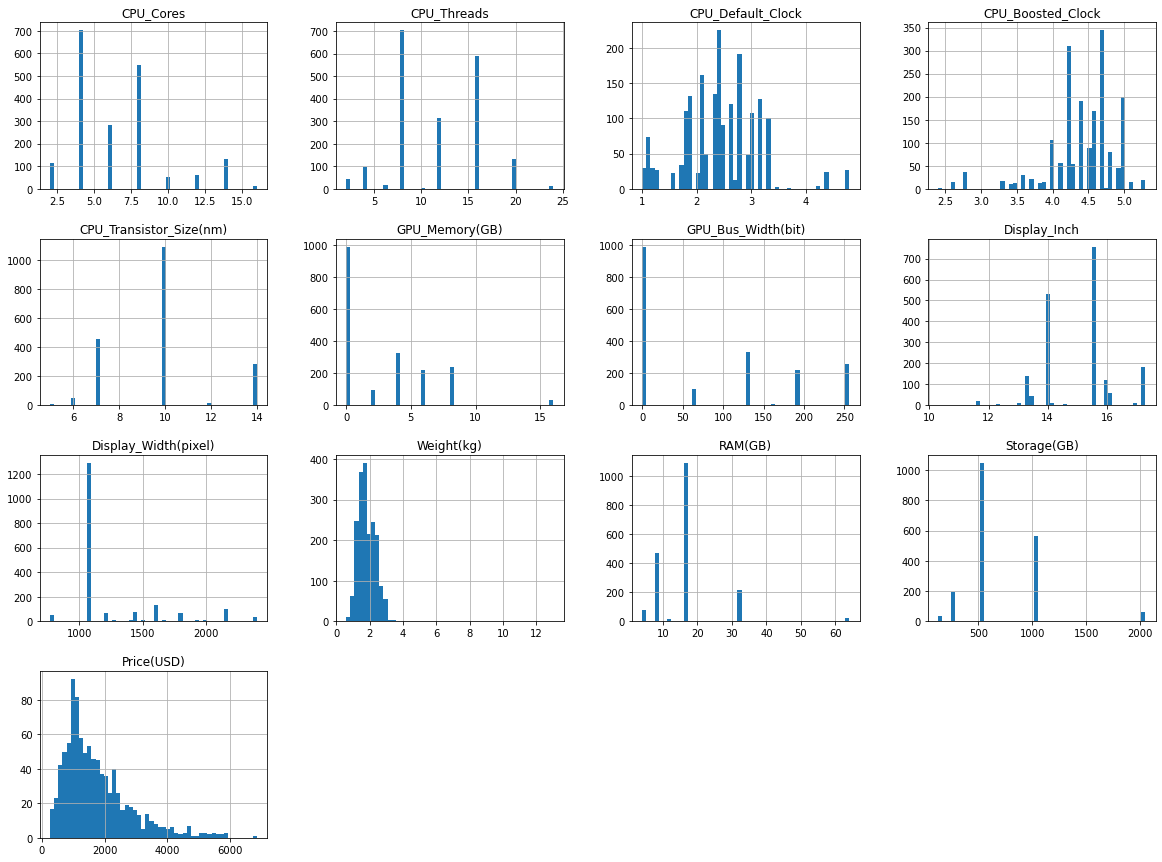

In [116]:
%matplotlib inline
from matplotlib import pyplot as plt

data_2.hist(bins=50, figsize=(20, 15));

In [106]:
data_2.isnull().sum()

CPU                          0
CPU_Cores                    0
CPU_Threads                  0
CPU_Default_Clock            0
CPU_Boosted_Clock           65
CPU_Transistor_Size(nm)      0
GPU                          0
GPU_Memory(GB)               0
GPU_Bus_Width(bit)           0
Display_Inch                 0
Display_Width(pixel)         0
Weight(kg)                   0
RAM(GB)                      0
Storage(GB)                  0
Price(USD)                 952
dtype: int64

C:\Users\namle\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price(USD)', ylabel='Density'>

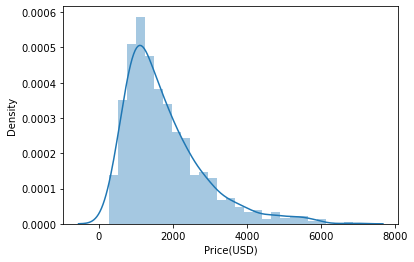

In [107]:
sns.distplot(data_2['Price(USD)'])

In [108]:
data_2['CPU_Boosted_Clock'].fillna(value = data_2['CPU_Boosted_Clock'].mean())

0       4.700000
1       4.500000
2       3.800000
3       4.700000
4       4.900000
          ...   
1902    4.424131
1903    4.424131
1904    3.300000
1905    4.400000
1906    4.500000
Name: CPU_Boosted_Clock, Length: 1907, dtype: float64

In [109]:
corelation = data_2.corr()

<AxesSubplot:>

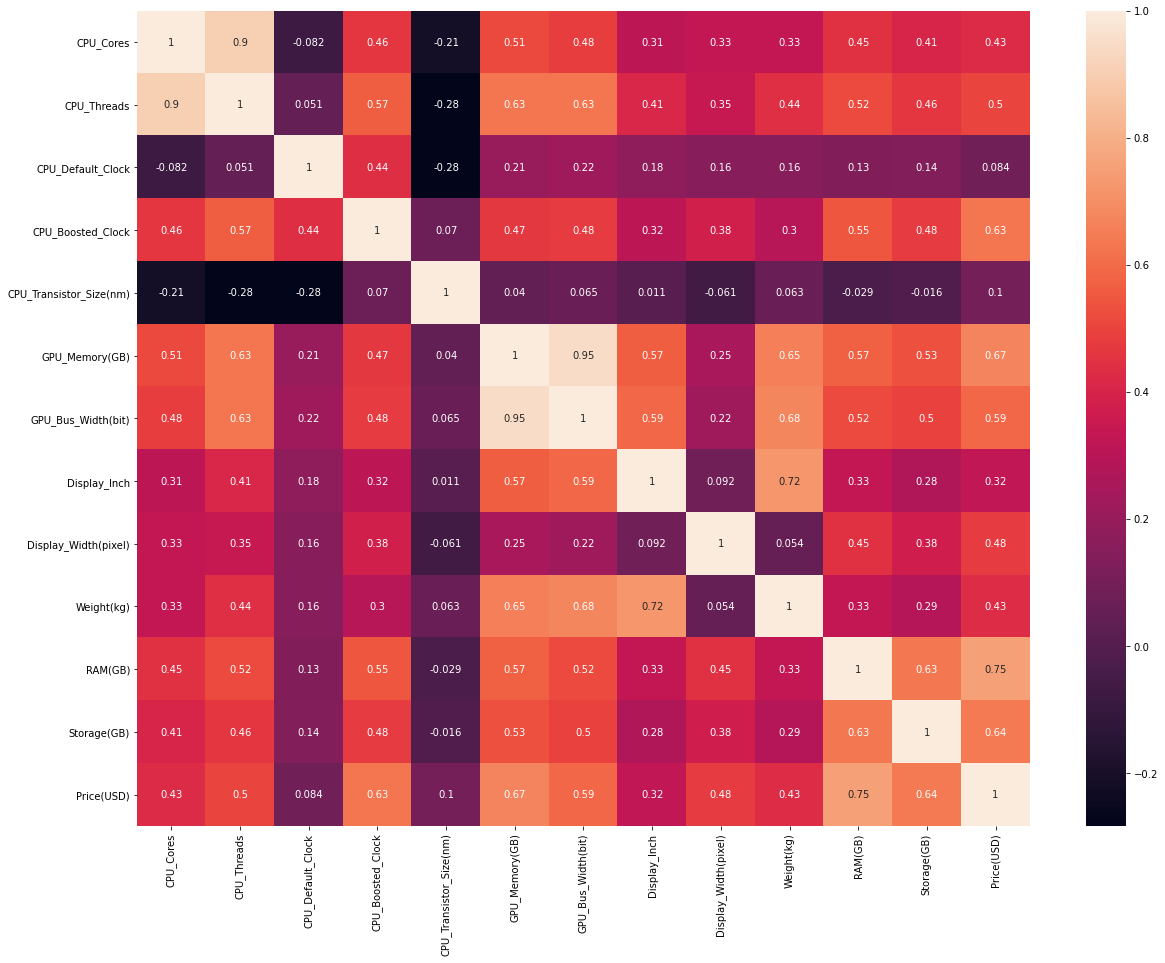

In [110]:
plt.figure(figsize=(20,15))
sns.heatmap(corelation, xticklabels = corelation.columns, yticklabels = corelation.columns, annot = True)

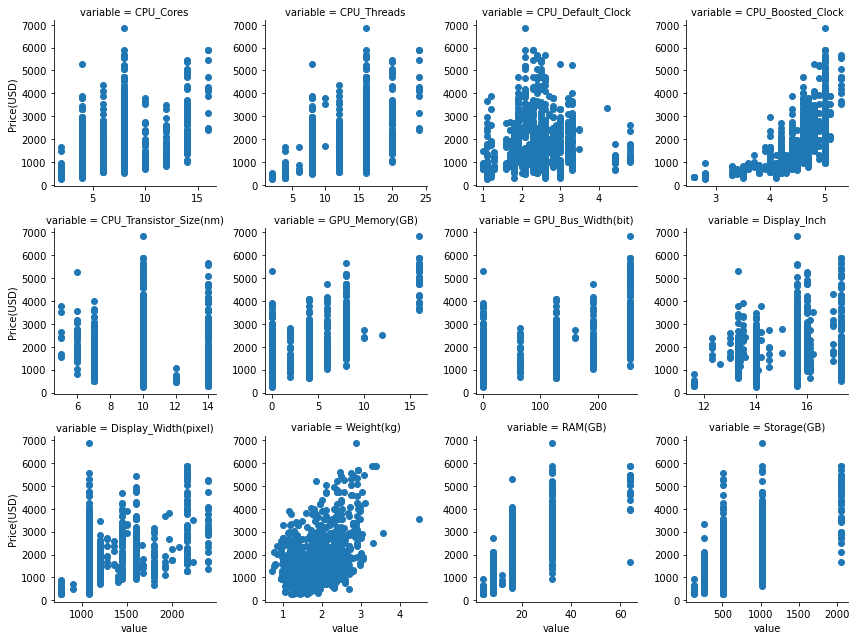

In [118]:
f = pd.melt(data_2, id_vars=['Price(USD)'], value_vars=quantitative)
grid = sns.FacetGrid(f, col='variable',  col_wrap=4, sharex=False, sharey=False)
grid = grid.map(plt.scatter, 'value', 'Price(USD)')

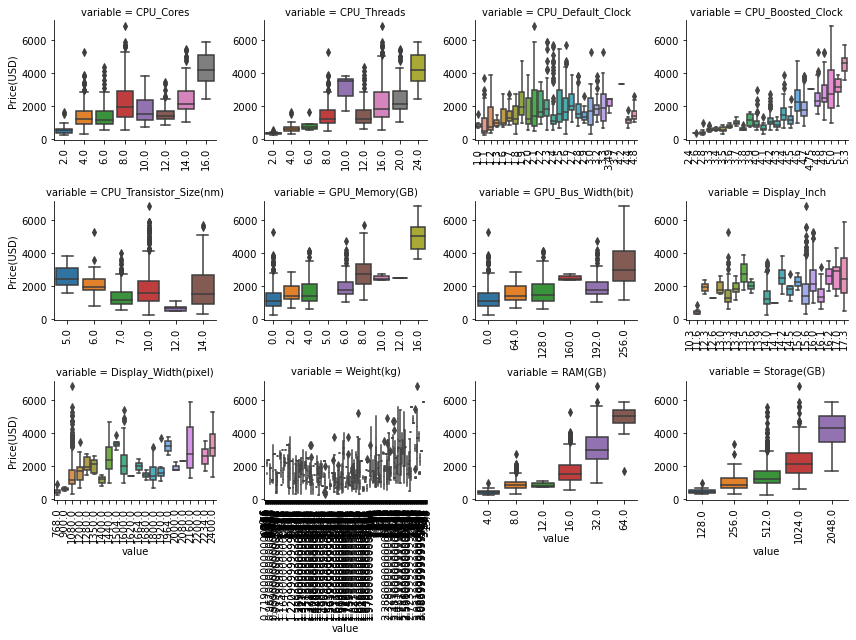

In [122]:
f = pd.melt(data_2, id_vars=['Price(USD)'], value_vars=quantitative)
grid = sns.FacetGrid(f, col='variable',  col_wrap=4, sharex=False, sharey=False)
grid = grid.map(boxplot, 'value', 'Price(USD)')